In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


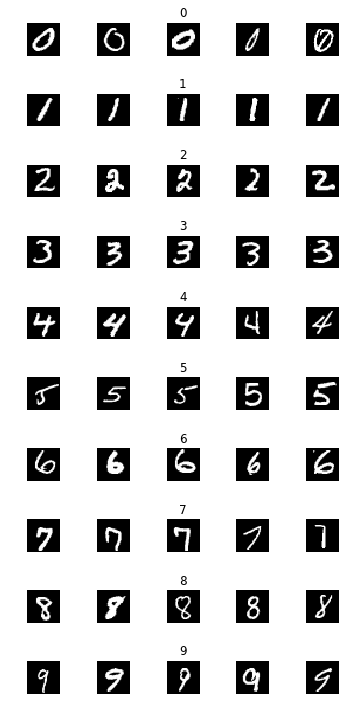

In [3]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


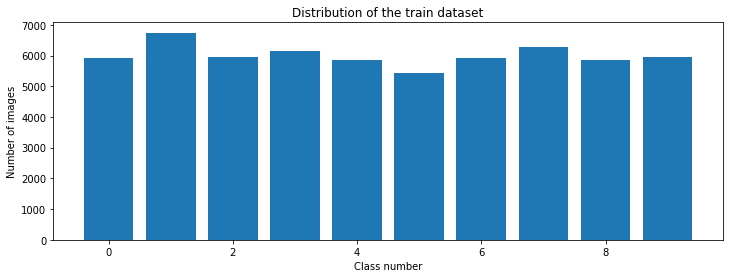

In [4]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss= 'categorical_crossentropy', metrics=['accuracy'])
  return model


In [7]:

model = leNet_model()
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)
  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 85us/step - loss: 0.2476 - acc: 0.9198 - val_loss: 0.0504 - val_acc: 0.9848
Epoch 2/5
54000/54000 [==============================] - 3s 50us/step - loss: 0.0696 - acc: 0.9781 - val_loss: 0.0368 - val_acc: 0.9895
Epoch 3/5
54000/54000 [==============================] - 3s 50us/step - loss: 0.0595 - acc: 0.9815 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 4/5
54000/54000 [==============================] - 3s 49us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0299 - val_acc: 0.9908
Epoch 5/5
54000/54000 [==============================] - 3s 49us/step - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0341 - val_acc: 0.9910


In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Score:', score[0])
print('Acc:', score[1])

Score: 0.033378210033556385
Acc: 0.9893


Text(0.5, 0, 'Epochs')

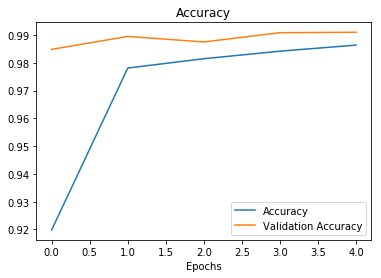

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

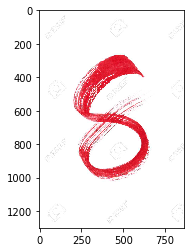

In [28]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/moji1980/moji19801210/moji1980121000092/15691010-8-handwritten-watercolor-number-isolated-on-white-background.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)



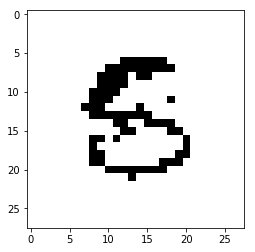

In [29]:
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)



In [0]:
layer1=Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2=Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

v_layer1 = layer1.predict(img)
v_layer2 = layer2.predict(img)

In [31]:
print('Prediction:', model.predict_classes(img)[0])

Prediction: 8


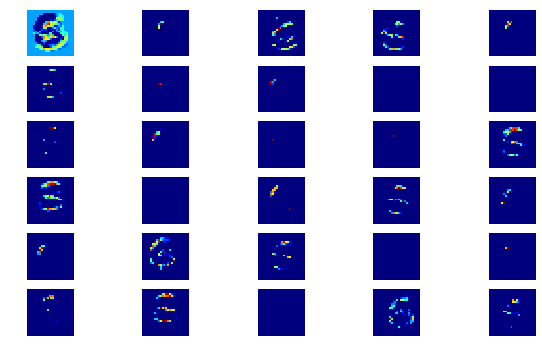

In [32]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(v_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

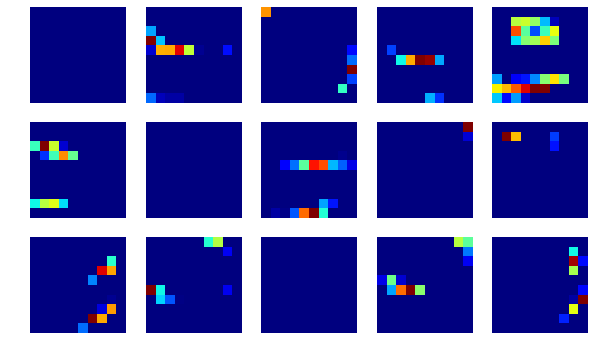

In [15]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(v_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')